In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsfonts}']

In [2]:
df = pd.read_csv('scalability_1d.csv')
df2 = pd.read_csv('scalability_marg.csv').set_index('d')

s = 12
w = 3

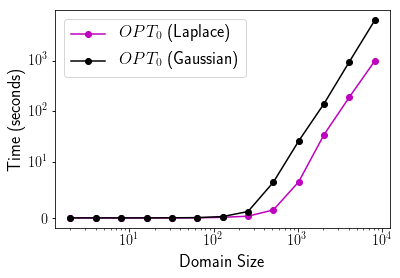

In [3]:
plt.plot(df.n, df.Laplace, 'mo-', label='$OPT_0$ (Laplace)')
plt.plot(df.n, df.Gaussian, 'ko-', label='$OPT_0$ (Gaussian)')
plt.legend(fontsize='xx-large')
plt.xlabel('Domain Size', fontsize='xx-large')
plt.ylabel('Time (seconds)', fontsize='xx-large')
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.xscale('log')
plt.yscale('symlog', linthreshy=10)
plt.savefig('scalability_1d.pdf')

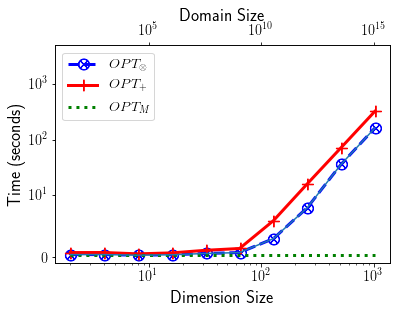

In [11]:
# domain is n^5
# union of k = 10 krons
# time for OPT_X is 5 outer iters * 5 dimensions * time(opt0)
# time for OPT_+ is 10 calls to optk * 5 optimizations * time(opt0)
# time for OPT_M must be measured for d=5
x = df.n.values[:-3] # x-axis range
y = df.Laplace.values[:-3] # simulated signal to plot

fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
ax2 = ax1.twiny()
plt.xticks(fontsize='x-large')

ax1.plot(x, 25*y, 'bx--', marker='$\otimes$', markersize=s, linewidth=w, label='$OPT_{\otimes}$')
ax1.plot(x, 50*y, 'rs-', marker='$+$', markersize=s, linewidth=w, label='$OPT_+$')
ax1.plot(x, [df2.loc[5]]*len(x), 'g:', markersize=s, linewidth=w, label='$OPT_M$')
ax2.plot(x**5, 25*y)
ax1.set_xscale('log')
ax2.set_xscale('log')
plt.yscale('symlog', linthreshy=10)
ax1.set_xticks([10,100,1000])
ax2.set_xticks([10**5,100**5,1000**5])
ax1.set_xlabel('Dimension Size', fontsize='xx-large')
ax2.set_xlabel('Domain Size', fontsize='xx-large')

ax1.set_ylabel('Time (seconds)', fontsize='xx-large')

ax1.legend(fontsize='x-large')
plt.ylim(-1, 5000)

plt.savefig('scalability_5d.pdf', bbox_inches='tight')

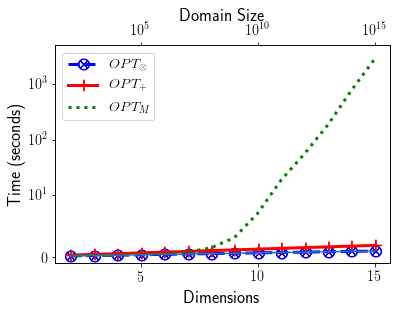

In [12]:
# domain is 10^d
# union of k=10 krons
# time for OPT_X is 5 outer iters * d dimensions * time(opt0)
# time for OPT_+ is 10 calls to optk * d dimensions * time(opt0)
# time for OPT_M must be measured

x = np.arange(2, 16) # x-axis range
opt0 = 0.012208
#y = df.Laplace.values[:-2] # simulated signal to plot

fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
ax2 = ax1.twiny()

ax1.plot(x, 5*x*opt0, 'bx--', marker='$\otimes$', markersize=s, linewidth=w, label='$OPT_{\otimes}$')
ax1.plot(x, 10*x*opt0, 'rs-', marker='$+$', markersize=s, linewidth=w, label='$OPT_+$')
ax1.plot(x, df2.loc[x], 'g:', markersize=s, linewidth=w, label='$OPT_M$')
ax2.plot(10**x, 5*x*opt0)
ax2.set_xscale('log')
plt.xticks(fontsize='x-large')
plt.yscale('symlog', linthreshy=10)
ax1.set_xticks([5,10,15])
ax2.set_xticks([10**5,10**10,10**15])
ax1.set_xlabel('Dimensions', fontsize='xx-large')
ax2.set_xlabel('Domain Size', fontsize='xx-large')
ax1.tick_params(axis='both', which='minor', labelsize='x-large')

ax1.set_ylabel('Time (seconds)', fontsize='xx-large')

ax1.legend(fontsize='x-large')

plt.xticks(fontsize='x-large')
plt.ylim(-1, 5000)

plt.savefig('scalability_nd.pdf', bbox_inches='tight')


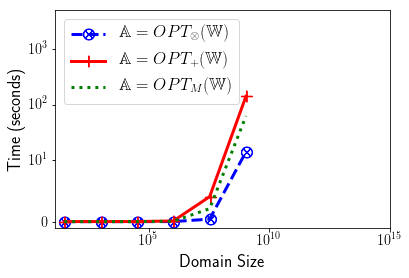

In [24]:
s = 12
w = 3
ls = pd.read_csv('scalability_ls.csv')
plt.plot(ls.n**5, ls.Kronecker, 'bx--', marker='$\otimes$', markersize=s, linewidth=w, label='$\mathbb{A} = OPT_{\otimes}(\mathbb{W})$')
plt.plot(ls.n**5, 10*ls.Kronecker, 'rs-', marker='$+$', markersize=s, linewidth=w, label='$\mathbb{A} = OPT_+(\mathbb{W})$')
plt.plot(ls.n**5, ls.Marginals, 'g:', markersize=s, linewidth=w, label='$\mathbb{A} = OPT_M(\mathbb{W})$')
plt.xscale('log')
plt.yscale('symlog', linthreshy=10)
plt.ylim(-1, 10**3)
plt.yticks(fontsize='x-large')
plt.xticks([10**5, 10**10, 10**15], fontsize='x-large')
plt.xlabel('Domain Size', fontsize='xx-large')
plt.ylabel('Time (seconds)', fontsize='xx-large')
plt.legend(loc='upper left', fontsize='xx-large')
plt.ylim(-1, 5000)

plt.savefig('scalability_ls.pdf', bbox_inches='tight')


In [23]:
fig.bbox